In [237]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [238]:
#Read the file into a dataframe 'data'
data=pd.read_csv('census income.csv')
data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [239]:
data.shape

(32560, 15)

In [240]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
Fnlwgt            32560 non-null int64
Education         32560 non-null object
Education_num     32560 non-null int64
Marital_status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital_gain      32560 non-null int64
Capital_loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Native_country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dataset has 32,560 rows and 15 columns.Problem statement is to predict if the income is >50K. 'Income' is the target variable and the 
others are features.

Age- numerical,integer


Workclass- categorical,nominal


Fnlwgt-Final weight-the number of people census believes the entry represents-numerical,integer- though it is integer as of now it 
there is no clear use of this column

Education-categorical

Education_num- categorical,ordinal- have to check if education and education_num are same

Marital_status- categorical,nominal

Occupation- categorical,nominal

Relationship-categorical,nominal

Race-categorical,nominal

Sex-categorical,nominal

Capital_gain- numerical,integer

Capital_loss- numerical,integer

Hours_per_week- numerical,integer

Native_country- categorical,nominal

This is a binary classification problem

In [242]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values are present in the dataset

Check the number of categories in each categorical column

In [243]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [244]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [245]:
data['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [246]:
data['Education'].nunique()

16

As can be seen,'Education_num' is the representation of 'Education'.So 'Education' can be removed.

In [247]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [248]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [249]:
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [250]:
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [251]:
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [252]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

'Workclass', 'Occupation' and 'Native_country' contain '?' which are missing values. Read the file again giving na_values parameter

In [253]:
data=pd.read_csv('census income.csv',na_values=" ?")

In [254]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Rows having null values are removed or imputation has to be done with mean/median/mode. Let's drop the rows with missing values and see the dataloss

In [255]:
data.shape

(32560, 15)

In [256]:
data.dropna(axis=0,how='any',inplace=True)

In [257]:
data.shape

(30161, 15)

In [258]:
(32560-30161)/32560

0.07367936117936118

As the dataset is large, it is ok to remove the rows with missing data.

In [259]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The datset has no missing values now.

Remove 'Fnlwgt' and 'Education_num' columns

In [260]:
data.drop(columns=['Fnlwgt','Education_num'],axis=1,inplace=True)
data.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Data Visualisation

Univariate Analysis

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 13 columns):
Age               30161 non-null int64
Workclass         30161 non-null object
Education         30161 non-null object
Marital_status    30161 non-null object
Occupation        30161 non-null object
Relationship      30161 non-null object
Race              30161 non-null object
Sex               30161 non-null object
Capital_gain      30161 non-null int64
Capital_loss      30161 non-null int64
Hours_per_week    30161 non-null int64
Native_country    30161 non-null object
Income            30161 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [262]:
data.describe()

,Age,Capital_gain,Capital_loss,Hours_per_week
count,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1091.971984,88.375419,40.931269
std,13.134882,7406.466659,404.304753,11.980182
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


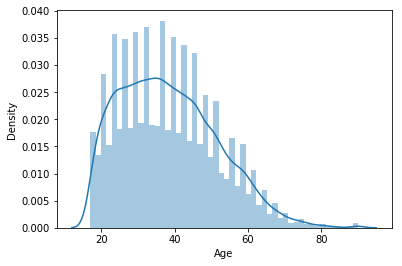

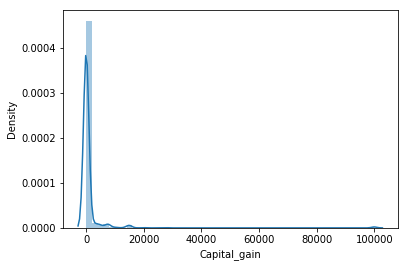

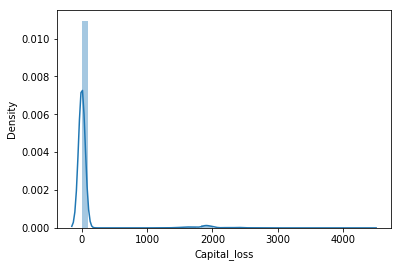

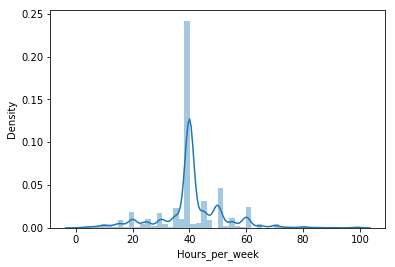

In [263]:
#Check the distribution of continous columns
list_cont=['Age','Capital_gain','Capital_loss','Hours_per_week']
for i in list_cont:
    plt.subplots(1,1)
    sns.distplot(data[i],kde=True)
    

To some extent Gaussian distribution is seen, but the data is skewed.

Analysis of 'Age' as groups might be useful.

In [264]:
bin=np.arange(0,100,10)


In [265]:
bin

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [266]:
age=pd.cut(data['Age'],bins=bin,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])

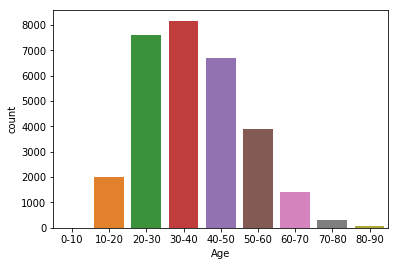

In [267]:
sns.countplot(age)

It can be seen that majority of the people are in the age group 20-50

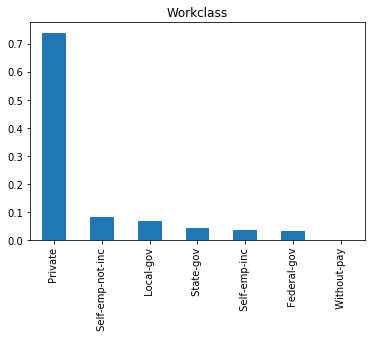

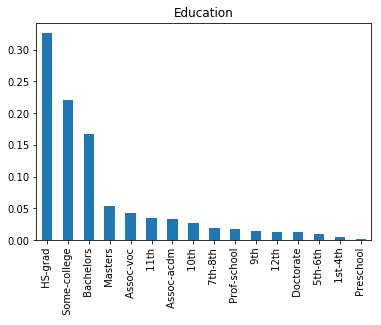

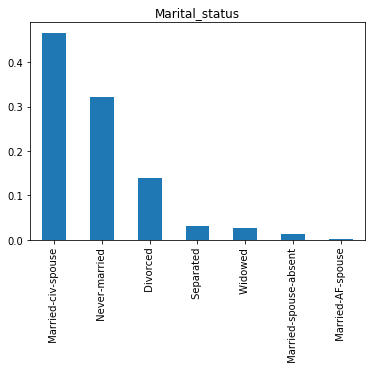

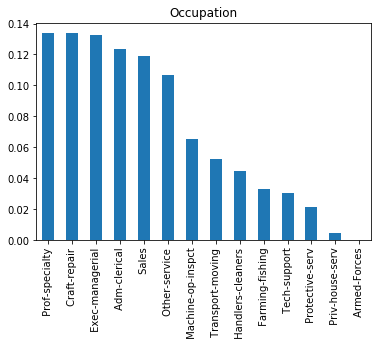

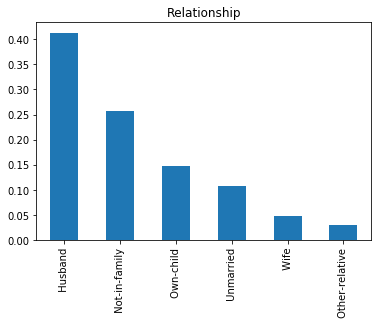

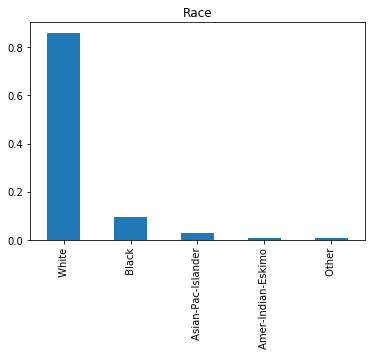

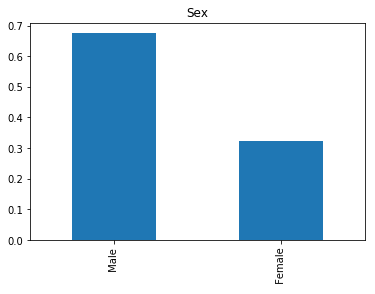

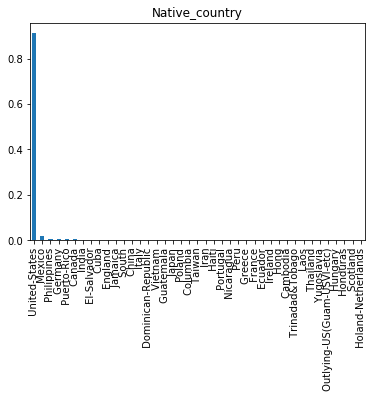

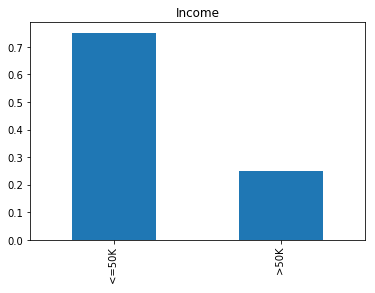

In [268]:
#Analyse the other columns also
list_cat=['Workclass','Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country','Income']
for i in list_cat:
    plt.subplots(1,1)
    data[i].value_counts(normalize=True).plot(kind='bar')
    plt.title(i)

Observations:
Most of the people have minimum High school education, very few have doctorate.

Majority of the individuals work in the private sector.

There is almost an uniform distribution of people across different occupations,excepts for armed forces and house serv

Majority of the people are Whites

Male Female proportion is not equal, males being very high in number than females

Regarding the target variable 'Income', there is imbalance in the dataset which has to be removed.




Bivariate Analysis

Analyse how 'Income' is affected by different features.

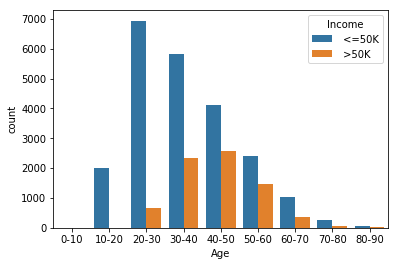

In [269]:
sns.countplot(age,hue=data['Income'])

Age groups 30-40 and 40-50 have higher number of people with >50K income. Definitely age is having an effect on Income 

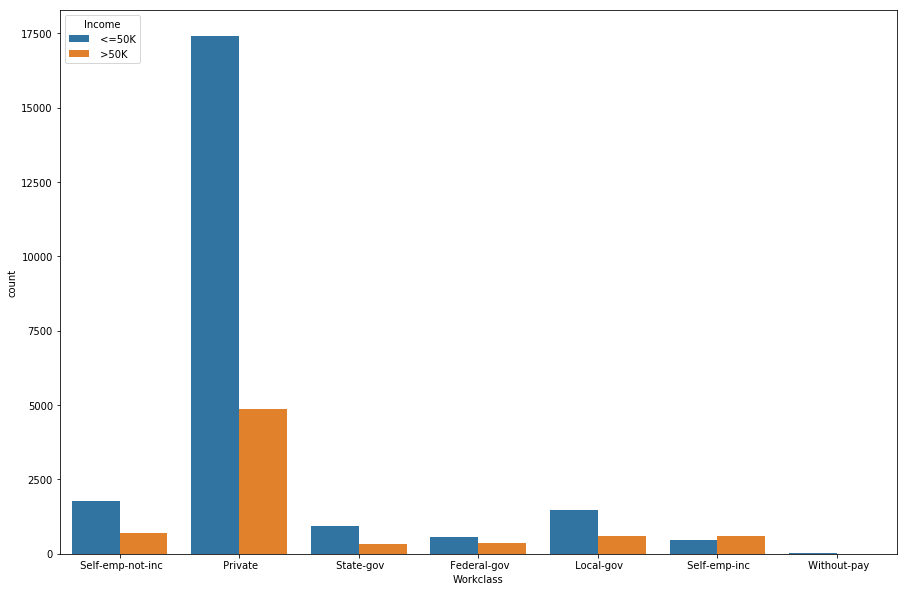

In [270]:
plt.figure(figsize=(15,10))
sns.countplot(data['Workclass'],hue=data['Income'])

WorkClass also has an effect on Income.

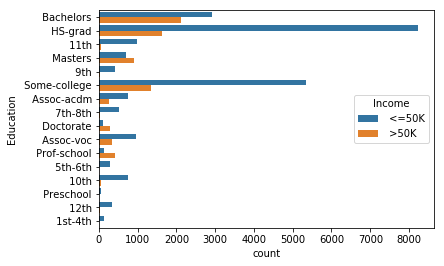

In [271]:
sns.countplot(y=data['Education'],hue=data['Income'])

Higher levels of education is correlated with higher proportion of people with income >50K. It can be observed that people with doctrate
(16) proportion of >50K is higher than <50K.

So Education has an effect on income.

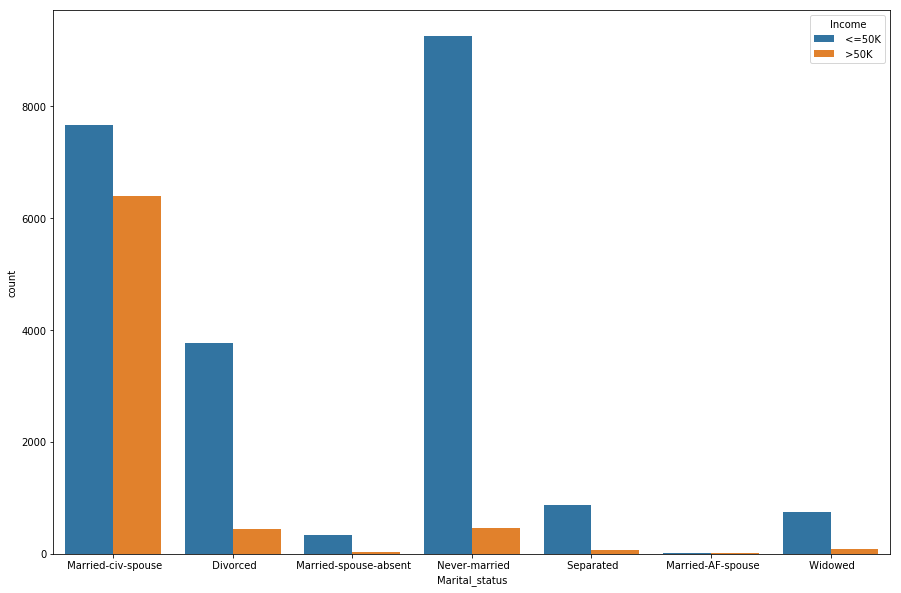

In [272]:
plt.figure(figsize=(15,10))
sns.countplot(data['Marital_status'],hue=data['Income'])

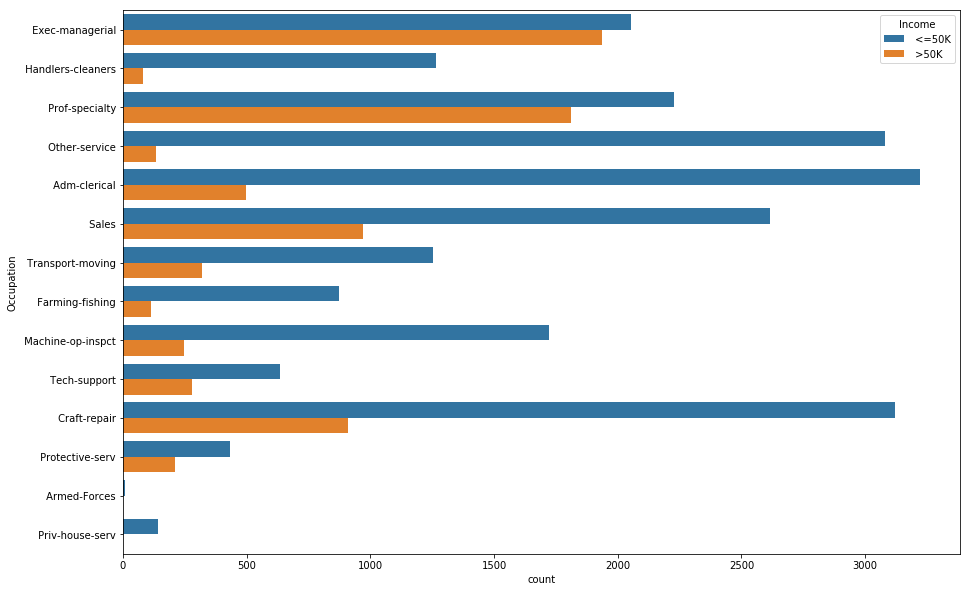

In [273]:
plt.figure(figsize=(15,10))
sns.countplot(y=data['Occupation'],hue=data['Income'])

Exec-managerial and prof-speciality are having high percentages of people with income >50K

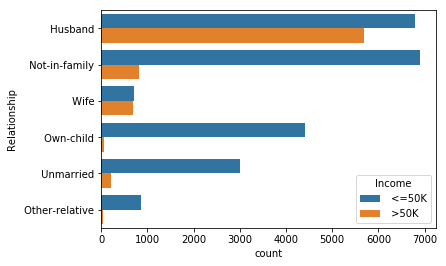

In [274]:
sns.countplot(y=data['Relationship'],hue=data['Income'])

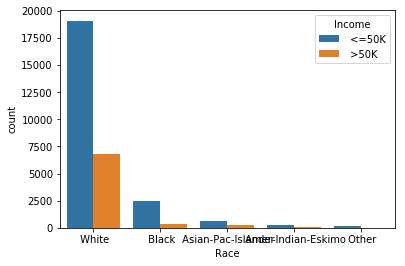

In [275]:
sns.countplot(data['Race'],hue=data['Income'])

Though the plot shows that whites have a higher percentage with >50k, we cannot infer as the proportion of whites in the sample is very
high(imbalanced)

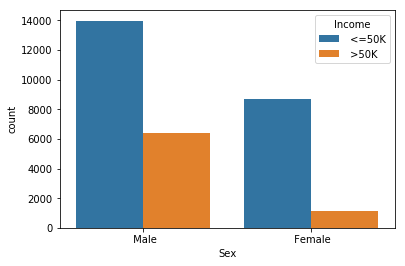

In [276]:
sns.countplot(data['Sex'],hue=data['Income'])

It is seen that percentage of males with income >50K is very high .

# Encoding

In [277]:
#Label Encode the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Income']=le.fit_transform(data['Income'])

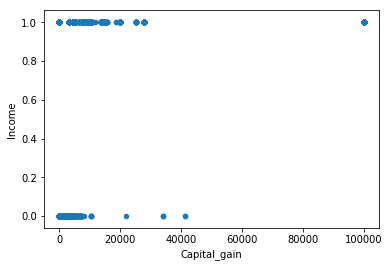

In [278]:
data.plot(x='Capital_gain',y='Income',kind='scatter')

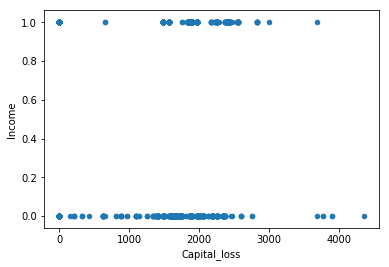

In [279]:
data.plot(x='Capital_loss',y='Income',kind='scatter')

There appears to be no effect of Capital_gain and Capital_loss

In [280]:
#Use get_dummies to convert the nominal categorical data to numericals
data_dummies=[]
for j in ['Workclass','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country']:
    data_dummies.append(pd.get_dummies(data[j],drop_first=True, prefix = j, prefix_sep = ':'))
data_dummies=pd.concat(data_dummies,axis=1)

In [281]:
data=pd.concat([data,data_dummies],axis=1)

In [282]:
data.drop(columns=['Workclass','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country'],axis=1,inplace=True)

In [283]:
#'Education' being ordinal can be label encoded
data['Education']=le.fit_transform(data['Education'])

In [284]:
data.head()

,Age,Education,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,Workclass: State-gov,Workclass: Without-pay,Marital_status: Married-AF-spouse,Marital_status: Married-civ-spouse,Marital_status: Married-spouse-absent,Marital_status: Never-married,Marital_status: Separated,Marital_status: Widowed,Occupation: Armed-Forces,Occupation: Craft-repair,Occupation: Exec-managerial,Occupation: Farming-fishing,Occupation: Handlers-cleaners,Occupation: Machine-op-inspct,Occupation: Other-service,Occupation: Priv-house-serv,Occupation: Prof-specialty,Occupation: Protective-serv,Occupation: Sales,Occupation: Tech-support,Occupation: Transport-moving,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White,Sex: Male,Native_country: Canada,Native_country: China,Native_country: Columbia,Native_country: Cuba,Native_country: Dominican-Republic,Native_country: Ecuador,Native_country: El-Salvador,Native_country: England,Native_country: France,Native_country: Germany,Native_country: Greece,Native_country: Guatemala,Native_country: Haiti,Native_country: Holand-Netherlands,Native_country: Honduras,Native_country: Hong,Native_country: Hungary,Native_country: India,Native_country: Iran,Native_country: Ireland,Native_country: Italy,Native_country: Jamaica,Native_country: Japan,Native_country: Laos,Native_country: Mexico,Native_country: Nicaragua,Native_country: Outlying-US(Guam-USVI-etc),Native_country: Peru,Native_country: Philippines,Native_country: Poland,Native_country: Portugal,Native_country: Puerto-Rico,Native_country: Scotland,Native_country: South,Native_country: Taiwan,Native_country: Thailand,Native_country: Trinadad&Tobago,Native_country: United-States,Native_country: Vietnam,Native_country: Yugoslavia
0,50,9,0,0,13,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,11,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,1,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,9,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,12,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [285]:
data[['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week','Income']].corr()

,Age,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,0.080154,0.060166,0.101599,0.24200
Capital_gain,0.080154,1.000000,-0.032228,0.080432,0.22120
Capital_loss,0.060166,-0.032228,1.000000,0.052417,0.15005
Hours_per_week,0.101599,0.080432,0.052417,1.000000,0.22948
Income,0.242000,0.221200,0.150050,0.229480,1.00000


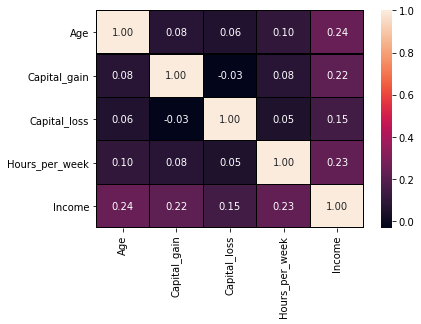

In [286]:
sns.heatmap(data[['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week','Income']].corr(),annot=True,linewidth=0.1,linecolor='Black',fmt='0.2f')

# Check For Outliers

In [287]:
list_cont

['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

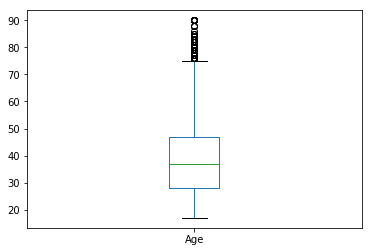

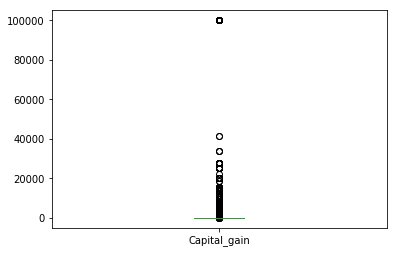

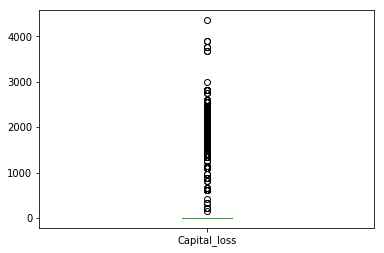

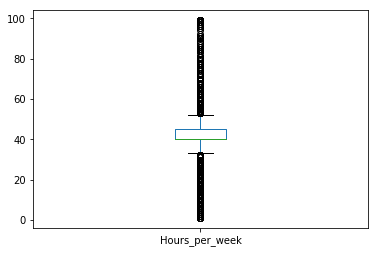

In [288]:
for i in list_cont:
    plt.subplots(1,1)
    data[i].plot.box()

Capital_loss and Capital_gain appear to have high no of outliers.Let us drop these 2 columns.

In the other columns,though outliers are there, data loss will be more. So continue with the outliers.

# Skewness

In [289]:
data.drop(columns=['Capital_gain','Capital_loss'],axis=1,inplace=True)

In [290]:
data[['Age','Hours_per_week']].skew()

Age               0.530223
Hours_per_week    0.330856
dtype: float64

Continous data columns are not highly skewed.

In [291]:
pd.set_option('max_columns',None)

In [292]:
data.describe()

,Age,Education,Hours_per_week,Income,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,Workclass: State-gov,Workclass: Without-pay,Marital_status: Married-AF-spouse,Marital_status: Married-civ-spouse,Marital_status: Married-spouse-absent,Marital_status: Never-married,Marital_status: Separated,Marital_status: Widowed,Occupation: Armed-Forces,Occupation: Craft-repair,Occupation: Exec-managerial,Occupation: Farming-fishing,Occupation: Handlers-cleaners,Occupation: Machine-op-inspct,Occupation: Other-service,Occupation: Priv-house-serv,Occupation: Prof-specialty,Occupation: Protective-serv,Occupation: Sales,Occupation: Tech-support,Occupation: Transport-moving,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White,Sex: Male,Native_country: Canada,Native_country: China,Native_country: Columbia,Native_country: Cuba,Native_country: Dominican-Republic,Native_country: Ecuador,Native_country: El-Salvador,Native_country: England,Native_country: France,Native_country: Germany,Native_country: Greece,Native_country: Guatemala,Native_country: Haiti,Native_country: Holand-Netherlands,Native_country: Honduras,Native_country: Hong,Native_country: Hungary,Native_country: India,Native_country: Iran,Native_country: Ireland,Native_country: Italy,Native_country: Jamaica,Native_country: Japan,Native_country: Laos,Native_country: Mexico,Native_country: Nicaragua,Native_country: Outlying-US(Guam-USVI-etc),Native_country: Peru,Native_country: Philippines,Native_country: Poland,Native_country: Portugal,Native_country: Puerto-Rico,Native_country: Scotland,Native_country: South,Native_country: Taiwan,Native_country: Thailand,Native_country: Trinadad&Tobago,Native_country: United-States,Native_country: Vietnam,Native_country: Yugoslavia
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,10.333809,40.931269,0.248931,0.068532,0.738901,0.035609,0.082855,0.042373,0.000464,0.000696,0.466331,0.012267,0.322436,0.031133,0.027420,0.000298,0.133616,0.132356,0.032791,0.04476,0.065184,0.106495,0.004741,0.133882,0.021352,0.118829,0.030238,0.052120,0.256125,0.029475,0.148072,0.106495,0.046616,0.029674,0.093399,0.007659,0.859786,0.675674,0.003548,0.002255,0.001857,0.003050,0.002221,0.000895,0.003316,0.002851,0.000895,0.004244,0.000962,0.002089,0.001393,0.000033,0.000398,0.000630,0.000431,0.003316,0.001393,0.000796,0.002255,0.002652,0.001956,0.000564,0.020225,0.001094,0.000464,0.000995,0.006233,0.001857,0.001127,0.003614,0.000365,0.002354,0.001393,0.000564,0.000597,0.911873,0.002122,0.000530
std,13.134882,3.812347,11.980182,0.432401,0.252661,0.439241,0.185316,0.275668,0.201441,0.021540,0.026378,0.498873,0.110079,0.467417,0.173680,0.163305,0.017272,0.340245,0.338883,0.178091,0.20678,0.246853,0.308475,0.068694,0.340531,0.144557,0.323592,0.171244,0.222273,0.436499,0.169137,0.355177,0.308475,0.210820,0.169689,0.290995,0.087181,0.34

# Scaling

In [293]:
#Split the dataframe to features and target
x=data.drop(columns='Income')
y=data['Income']

In [294]:
x.head()

,Age,Education,Hours_per_week,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,Workclass: State-gov,Workclass: Without-pay,Marital_status: Married-AF-spouse,Marital_status: Married-civ-spouse,Marital_status: Married-spouse-absent,Marital_status: Never-married,Marital_status: Separated,Marital_status: Widowed,Occupation: Armed-Forces,Occupation: Craft-repair,Occupation: Exec-managerial,Occupation: Farming-fishing,Occupation: Handlers-cleaners,Occupation: Machine-op-inspct,Occupation: Other-service,Occupation: Priv-house-serv,Occupation: Prof-specialty,Occupation: Protective-serv,Occupation: Sales,Occupation: Tech-support,Occupation: Transport-moving,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White,Sex: Male,Native_country: Canada,Native_country: China,Native_country: Columbia,Native_country: Cuba,Native_country: Dominican-Republic,Native_country: Ecuador,Native_country: El-Salvador,Native_country: England,Native_country: France,Native_country: Germany,Native_country: Greece,Native_country: Guatemala,Native_country: Haiti,Native_country: Holand-Netherlands,Native_country: Honduras,Native_country: Hong,Native_country: Hungary,Native_country: India,Native_country: Iran,Native_country: Ireland,Native_country: Italy,Native_country: Jamaica,Native_country: Japan,Native_country: Laos,Native_country: Mexico,Native_country: Nicaragua,Native_country: Outlying-US(Guam-USVI-etc),Native_country: Peru,Native_country: Philippines,Native_country: Poland,Native_country: Portugal,Native_country: Puerto-Rico,Native_country: Scotland,Native_country: South,Native_country: Taiwan,Native_country: Thailand,Native_country: Trinadad&Tobago,Native_country: United-States,Native_country: Vietnam,Native_country: Yugoslavia
0,50,9,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,11,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,1,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,9,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,12,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [295]:
x.describe()

,Age,Education,Hours_per_week,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,Workclass: State-gov,Workclass: Without-pay,Marital_status: Married-AF-spouse,Marital_status: Married-civ-spouse,Marital_status: Married-spouse-absent,Marital_status: Never-married,Marital_status: Separated,Marital_status: Widowed,Occupation: Armed-Forces,Occupation: Craft-repair,Occupation: Exec-managerial,Occupation: Farming-fishing,Occupation: Handlers-cleaners,Occupation: Machine-op-inspct,Occupation: Other-service,Occupation: Priv-house-serv,Occupation: Prof-specialty,Occupation: Protective-serv,Occupation: Sales,Occupation: Tech-support,Occupation: Transport-moving,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White,Sex: Male,Native_country: Canada,Native_country: China,Native_country: Columbia,Native_country: Cuba,Native_country: Dominican-Republic,Native_country: Ecuador,Native_country: El-Salvador,Native_country: England,Native_country: France,Native_country: Germany,Native_country: Greece,Native_country: Guatemala,Native_country: Haiti,Native_country: Holand-Netherlands,Native_country: Honduras,Native_country: Hong,Native_country: Hungary,Native_country: India,Native_country: Iran,Native_country: Ireland,Native_country: Italy,Native_country: Jamaica,Native_country: Japan,Native_country: Laos,Native_country: Mexico,Native_country: Nicaragua,Native_country: Outlying-US(Guam-USVI-etc),Native_country: Peru,Native_country: Philippines,Native_country: Poland,Native_country: Portugal,Native_country: Puerto-Rico,Native_country: Scotland,Native_country: South,Native_country: Taiwan,Native_country: Thailand,Native_country: Trinadad&Tobago,Native_country: United-States,Native_country: Vietnam,Native_country: Yugoslavia
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,10.333809,40.931269,0.068532,0.738901,0.035609,0.082855,0.042373,0.000464,0.000696,0.466331,0.012267,0.322436,0.031133,0.027420,0.000298,0.133616,0.132356,0.032791,0.04476,0.065184,0.106495,0.004741,0.133882,0.021352,0.118829,0.030238,0.052120,0.256125,0.029475,0.148072,0.106495,0.046616,0.029674,0.093399,0.007659,0.859786,0.675674,0.003548,0.002255,0.001857,0.003050,0.002221,0.000895,0.003316,0.002851,0.000895,0.004244,0.000962,0.002089,0.001393,0.000033,0.000398,0.000630,0.000431,0.003316,0.001393,0.000796,0.002255,0.002652,0.001956,0.000564,0.020225,0.001094,0.000464,0.000995,0.006233,0.001857,0.001127,0.003614,0.000365,0.002354,0.001393,0.000564,0.000597,0.911873,0.002122,0.000530
std,13.134882,3.812347,11.980182,0.252661,0.439241,0.185316,0.275668,0.201441,0.021540,0.026378,0.498873,0.110079,0.467417,0.173680,0.163305,0.017272,0.340245,0.338883,0.178091,0.20678,0.246853,0.308475,0.068694,0.340531,0.144557,0.323592,0.171244,0.222273,0.436499,0.169137,0.355177,0.308475,0.210820,0.169689,0.290995,0.087181,0.347215,0.468130,0.059457,0.047430,0.0430

It can be seen that Age,Education and Hours_per_week values vary in range from other columns. They have to be scaled before fitting the models

In [296]:
#Scale the 'Age', 'Education' and 'Hours_per_week' columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x[['Age','Education','Hours_per_week']]=scaler.fit_transform(x[['Age','Education','Hours_per_week']])

In [297]:
x.head()

,Age,Education,Hours_per_week,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,Workclass: State-gov,Workclass: Without-pay,Marital_status: Married-AF-spouse,Marital_status: Married-civ-spouse,Marital_status: Married-spouse-absent,Marital_status: Never-married,Marital_status: Separated,Marital_status: Widowed,Occupation: Armed-Forces,Occupation: Craft-repair,Occupation: Exec-managerial,Occupation: Farming-fishing,Occupation: Handlers-cleaners,Occupation: Machine-op-inspct,Occupation: Other-service,Occupation: Priv-house-serv,Occupation: Prof-specialty,Occupation: Protective-serv,Occupation: Sales,Occupation: Tech-support,Occupation: Transport-moving,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White,Sex: Male,Native_country: Canada,Native_country: China,Native_country: Columbia,Native_country: Cuba,Native_country: Dominican-Republic,Native_country: Ecuador,Native_country: El-Salvador,Native_country: England,Native_country: France,Native_country: Germany,Native_country: Greece,Native_country: Guatemala,Native_country: Haiti,Native_country: Holand-Netherlands,Native_country: Honduras,Native_country: Hong,Native_country: Hungary,Native_country: India,Native_country: Iran,Native_country: Ireland,Native_country: Italy,Native_country: Jamaica,Native_country: Japan,Native_country: Laos,Native_country: Mexico,Native_country: Nicaragua,Native_country: Outlying-US(Guam-USVI-etc),Native_country: Peru,Native_country: Philippines,Native_country: Poland,Native_country: Portugal,Native_country: Puerto-Rico,Native_country: Scotland,Native_country: South,Native_country: Taiwan,Native_country: Thailand,Native_country: Trinadad&Tobago,Native_country: United-States,Native_country: Vietnam,Native_country: Yugoslavia
0,0.452055,0.600000,0.122449,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.733333,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.493151,0.066667,0.397959,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.150685,0.600000,0.397959,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.273973,0.800000,0.397959,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [298]:
x.describe()

,Age,Education,Hours_per_week,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,Workclass: State-gov,Workclass: Without-pay,Marital_status: Married-AF-spouse,Marital_status: Married-civ-spouse,Marital_status: Married-spouse-absent,Marital_status: Never-married,Marital_status: Separated,Marital_status: Widowed,Occupation: Armed-Forces,Occupation: Craft-repair,Occupation: Exec-managerial,Occupation: Farming-fishing,Occupation: Handlers-cleaners,Occupation: Machine-op-inspct,Occupation: Other-service,Occupation: Priv-house-serv,Occupation: Prof-specialty,Occupation: Protective-serv,Occupation: Sales,Occupation: Tech-support,Occupation: Transport-moving,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White,Sex: Male,Native_country: Canada,Native_country: China,Native_country: Columbia,Native_country: Cuba,Native_country: Dominican-Republic,Native_country: Ecuador,Native_country: El-Salvador,Native_country: England,Native_country: France,Native_country: Germany,Native_country: Greece,Native_country: Guatemala,Native_country: Haiti,Native_country: Holand-Netherlands,Native_country: Honduras,Native_country: Hong,Native_country: Hungary,Native_country: India,Native_country: Iran,Native_country: Ireland,Native_country: Italy,Native_country: Jamaica,Native_country: Japan,Native_country: Laos,Native_country: Mexico,Native_country: Nicaragua,Native_country: Outlying-US(Guam-USVI-etc),Native_country: Peru,Native_country: Philippines,Native_country: Poland,Native_country: Portugal,Native_country: Puerto-Rico,Native_country: Scotland,Native_country: South,Native_country: Taiwan,Native_country: Thailand,Native_country: Trinadad&Tobago,Native_country: United-States,Native_country: Vietnam,Native_country: Yugoslavia
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,0.293670,0.688921,0.407462,0.068532,0.738901,0.035609,0.082855,0.042373,0.000464,0.000696,0.466331,0.012267,0.322436,0.031133,0.027420,0.000298,0.133616,0.132356,0.032791,0.04476,0.065184,0.106495,0.004741,0.133882,0.021352,0.118829,0.030238,0.052120,0.256125,0.029475,0.148072,0.106495,0.046616,0.029674,0.093399,0.007659,0.859786,0.675674,0.003548,0.002255,0.001857,0.003050,0.002221,0.000895,0.003316,0.002851,0.000895,0.004244,0.000962,0.002089,0.001393,0.000033,0.000398,0.000630,0.000431,0.003316,0.001393,0.000796,0.002255,0.002652,0.001956,0.000564,0.020225,0.001094,0.000464,0.000995,0.006233,0.001857,0.001127,0.003614,0.000365,0.002354,0.001393,0.000564,0.000597,0.911873,0.002122,0.000530
std,0.179930,0.254156,0.122247,0.252661,0.439241,0.185316,0.275668,0.201441,0.021540,0.026378,0.498873,0.110079,0.467417,0.173680,0.163305,0.017272,0.340245,0.338883,0.178091,0.20678,0.246853,0.308475,0.068694,0.340531,0.144557,0.323592,0.171244,0.222273,0.436499,0.169137,0.355177,0.308475,0.210820,0.169689,0.290995,0.087181,0.347215,0.468130,0.059457,0.047430,0.043050,0.

# Fitting the models

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

In [186]:
y.value_counts(normalize=True)

0    0.751069
1    0.248931
Name: Income, dtype: float64

There is slight imbalance in the target variable. So split the data in a stratified way. Use f1Score and ROC-AUC curve to choose the bset fit model.

# Logistic Regression

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
pred=lgr.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix   ',confusion_matrix(y_test,pred))
print('classification report')
print(classification_report(y_test,pred))

accuracy score 0.8245109956901315
confusion matrix    [[6206  590]
 [ 998 1255]]
classification report
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      6796
           1       0.68      0.56      0.61      2253

    accuracy                           0.82      9049
   macro avg       0.77      0.74      0.75      9049
weighted avg       0.82      0.82      0.82      9049



# AUC-ROC Curve

In [190]:
y_pred_prob=lgr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

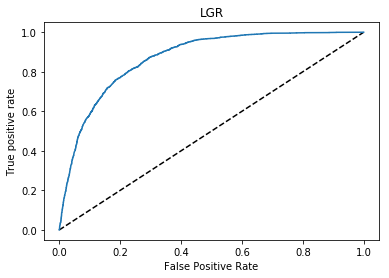

In [192]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='lgr')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('LGR')
plt.show()

In [194]:
auc_score=roc_auc_score(y_test,lgr.predict(x_test))
auc_score

0.7351096451869681

In [195]:
score=cross_val_score(lgr,x,y,cv=8)
print(score.mean())


0.8189053150280621


# Decision Tree Classifier

In [196]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix',confusion_matrix(y_test,pred))
print('classification report',classification_report(y_test,pred))

accuracy score 0.7769919328102552
confusion matrix [[5826  970]
 [1048 1205]]
classification report               precision    recall  f1-score   support

           0       0.85      0.86      0.85      6796
           1       0.55      0.53      0.54      2253

    accuracy                           0.78      9049
   macro avg       0.70      0.70      0.70      9049
weighted avg       0.77      0.78      0.78      9049



# AUC-ROC Curve

In [197]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

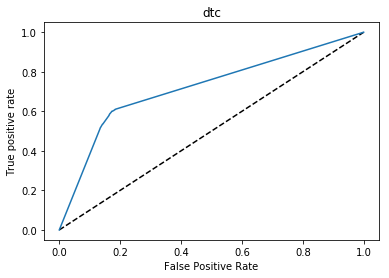

In [198]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='dtc')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('dtc')
plt.show()

In [199]:
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

0.6960557070332226

In [201]:
score=cross_val_score(dtc,x,y,cv=8)
print(score.mean())


0.7749084701269706


# Naive Bayes Classifier

In [202]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print('accuracy score:',accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

accuracy score: 0.7857221792463256
[[5482 1314]
 [ 625 1628]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      6796
           1       0.55      0.72      0.63      2253

    accuracy                           0.79      9049
   macro avg       0.73      0.76      0.74      9049
weighted avg       0.81      0.79      0.79      9049



AUC- ROC Curve

In [203]:
y_pred_prob=mnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

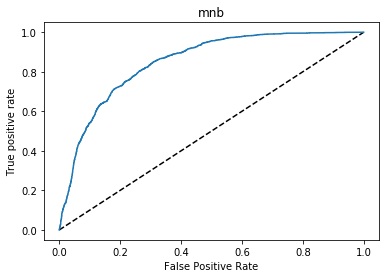

In [204]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='mnb')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('mnb')
plt.show()

In [205]:
auc_score=roc_auc_score(y_test,mnb.predict(x_test))
auc_score

0.7646215352912485

Cross Validation

In [206]:
score=cross_val_score(mnb,x,y,cv=8)
print(score.mean())


0.7943371672128564


# Support Vector Classifier

In [209]:
svc=SVC(kernel='poly',probability=True)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy_score  ',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score   0.8190960327107968
[[6237  559]
 [1078 1175]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      6796
           1       0.68      0.52      0.59      2253

    accuracy                           0.82      9049
   macro avg       0.77      0.72      0.74      9049
weighted avg       0.81      0.82      0.81      9049



AUC - ROC Curve

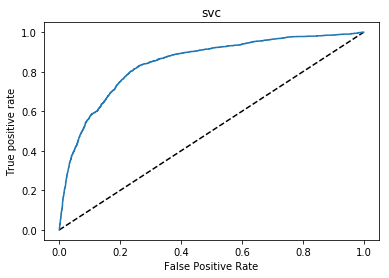

In [210]:
y_pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='svc')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('svc')
plt.show()

In [211]:
auc_score=roc_auc_score(y_test,svc.predict(x_test))
auc_score

0.7196362929343832

Cross Validation

In [212]:
score=cross_val_score(svc,x,y,cv=8)
print(score.mean())


0.8188389756532297


# Gradient Boosting Classifier

In [214]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
pred=gbc.predict(x_test)
print('accuracy_score  ',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score   0.8322466570891811
[[6287  509]
 [1009 1244]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6796
           1       0.71      0.55      0.62      2253

    accuracy                           0.83      9049
   macro avg       0.79      0.74      0.76      9049
weighted avg       0.82      0.83      0.82      9049



AUC - ROC Curve

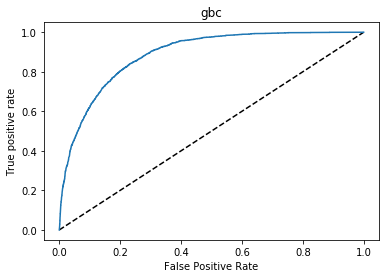

In [215]:
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='gbc')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('gbc')
plt.show()

In [216]:
auc_score=roc_auc_score(y_test,gbc.predict(x_test))
auc_score

0.7386278435371111

Cross Validation

In [217]:
score=cross_val_score(gbc,x,y,cv=8)
print(score.mean())


0.8350520638799381


# KNN Classifier

In [220]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score 0.8083766162006851
[[6029  767]
 [ 967 1286]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      6796
           1       0.63      0.57      0.60      2253

    accuracy                           0.81      9049
   macro avg       0.74      0.73      0.74      9049
weighted avg       0.80      0.81      0.81      9049



AUC - ROC Curve

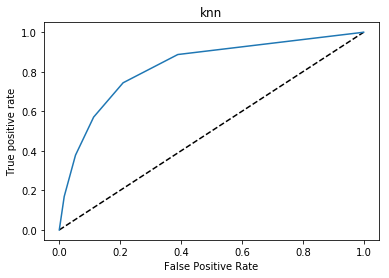

In [221]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('knn')
plt.show()

In [222]:
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

0.7289669950235733

Cross Validation

In [223]:
score=cross_val_score(knn,x,y,cv=8)
print(score.mean())


0.8113459762377547


# Seeing the f1score,auc score and precision Logistic Regression and Gradient boosting classifier are better.
Let us choose Logistic regression and do hyperparameter tuning

# Hyper Parameter Tuning Logistic regression

In [230]:
from sklearn.model_selection import GridSearchCV
params={'C':[0.01,0.1,1,10,100],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'penalty':['l1','l2','elasticnet','none'],'class_weight':['balanced',None]}
model=LogisticRegression()
grid=GridSearchCV(estimator=model,param_grid=params,cv=5,scoring='roc_auc')
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)


0.8710056982313009
{'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
Fit the data with the above parameters

In [231]:
lgr=LogisticRegression(C= 1, class_weight= None, penalty= 'l2', solver= 'lbfgs')
lgr.fit(x_train,y_train)
pred=lgr.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix   ',confusion_matrix(y_test,pred))
print('classification report')
print(classification_report(y_test,pred))

accuracy score 0.8245109956901315
confusion matrix    [[6206  590]
 [ 998 1255]]
classification report
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      6796
           1       0.68      0.56      0.61      2253

    accuracy                           0.82      9049
   macro avg       0.77      0.74      0.75      9049
weighted avg       0.82      0.82      0.82      9049



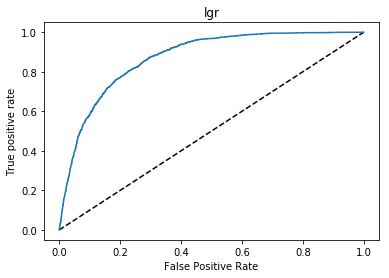

In [232]:
y_pred_prob=lgr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='lgr')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('lgr')
plt.show()

In [234]:
auc_score=roc_auc_score(y_test,lgr.predict(x_test))
auc_score

0.7351096451869681

In [ ]:
There is not much change with the parameters from GridSearchCV. Save the Model.

# Saving the Model

In [235]:
import joblib
joblib.dump(svc,'lgrfile.obj')
lir_from_joblib=joblib.load('lgrfile.obj')
lir_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1])